In [48]:
from PIL import ImageFile
import h5py


import matplotlib.pylab as plt
from matplotlib import cm
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from keras.utils import to_categorical
from keras.preprocessing import image as keras_image
from keras.callbacks import ModelCheckpoint

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, GlobalAveragePooling1D, GlobalAveragePooling2D
from keras.layers import Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D


In [49]:
# Plot the Neural network fitting history
def history_plot(fit_history, n):
    plt.figure(figsize=(18, 12))
    
    plt.subplot(211)
    plt.plot(fit_history.history['loss'][n:], color='slategray', label = 'train')
    plt.plot(fit_history.history['val_loss'][n:], color='#4876ff', label = 'valid')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title('Loss Function');  
    
    plt.subplot(212)
    plt.plot(fit_history.history['acc'][n:], color='slategray', label = 'train')
    plt.plot(fit_history.history['val_acc'][n:], color='#4876ff', label = 'valid')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")    
    plt.legend()
    plt.title('Accuracy');

In [50]:
import pandas as pd
import sys
import numpy as np
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("C:/Users/16703/Desktop/letters.csv")
files = data['file']
letters = data['letter']
backgrounds = data['background']
label=data['label']

In [51]:
# Read the h5 file
f = h5py.File('C:/Users/16703/Desktop/LetterColorImages.h5', 'r')

# List all groups
keys = list(f.keys())
keys

['backgrounds', 'images', 'labels']

In [52]:
# Create tensors and targets
tensors = np.array(f[keys[1]])#image
targets = np.array(f[keys[2]])#lable
print ('Tensor shape:', tensors.shape)
print ('Target shape', targets.shape)
print (32*32) # the size of the images are the size of the feature vectors


Tensor shape: (1650, 32, 32, 3)
Target shape (1650,)
1024


In [53]:
# Normalize the tensors
tensors = tensors.astype('float32')/255

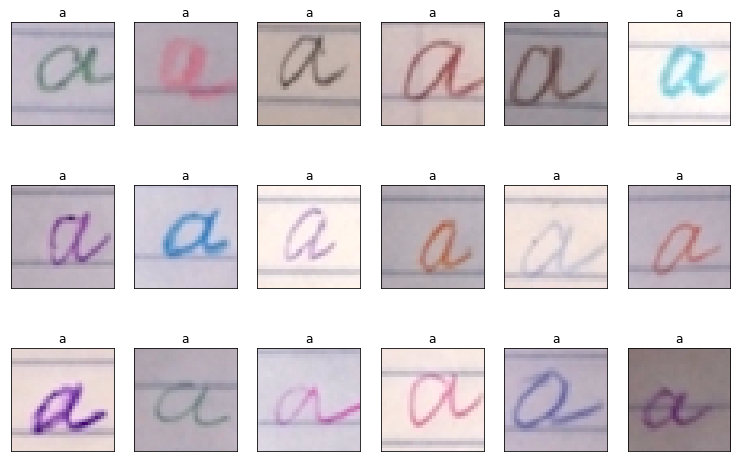

In [54]:
# a helper plotting function
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(tensors, letters, 3, 3) # defaults to showing a 3 by 6 subset of the faces

Label:  в


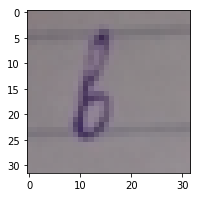

In [55]:
# Read and display a tensor using Matplotlib
print('Label: ', letters[100])
plt.figure(figsize=(3,3))
plt.imshow(tensors[100]);

In [56]:
# import pandas as pd
import sys
import numpy as np
import warnings
warnings.filterwarnings("ignore")
data2 = pd.read_csv("C:/Users/16703/Desktop/letters2.csv")
files2 = data2['file']
letters2 = data2['letter']
backgrounds2 = data2['background']
label2=data2['label']

In [68]:
f2 = h5py.File('C:/Users/16703/Desktop/LetterColorImages2.h5', 'r')

# List all groups
keys2 = list(f2.keys())
keys2


['backgrounds', 'images', 'labels']

In [58]:
tensors2 = np.array(f2[keys2[1]])#image
targets2 = np.array(f2[keys2[2]])#lable

print ('Tensor shape:', tensors2.shape)
print ('Target shape', targets2.shape)
print (32*32) # the size of the images are the size of the feature vectors

Tensor shape: (5940, 32, 32, 3)
Target shape (5940,)
1024


In [73]:
gray_tensors = np.dot(tensors[...,:3], [0.299, 0.587, 0.114])
print ('Grayscaled Tensor shape:', gray_tensors.shape)


Grayscaled Tensor shape: (1650, 32, 32)


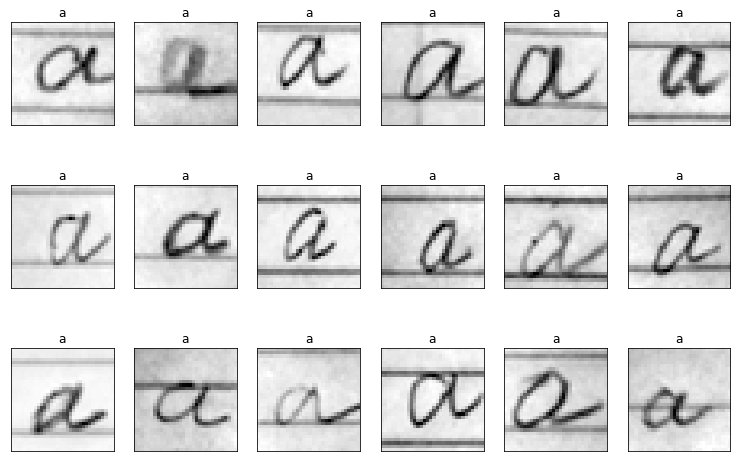

In [84]:
h = 32
w = 32
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(gray_tensors, letters, h, w)

In [85]:
two_d_Tensors = gray_tensors.reshape(1650,1024)
print ('two_d_Tensors shape:', two_d_Tensors.shape)

two_d_Tensors shape: (1650, 1024)


In [87]:
gray_tensors2 = np.dot(tensors2[...,:3], [0.299, 0.587, 0.114])
print ('Grayscaled Tensor shape:', gray_tensors2.shape)
two_d_Tensors2 = gray_tensors2.reshape(5940,1024)
print ('two_d_Tensors shape:', two_d_Tensors2.shape)

Grayscaled Tensor shape: (5940, 32, 32)
two_d_Tensors shape: (5940, 1024)


In [106]:
print(label)

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
1620    33
1621    33
1622    33
1623    33
1624    33
1625    33
1626    33
1627    33
1628    33
1629    33
1630    33
1631    33
1632    33
1633    33
1634    33
1635    33
1636    33
1637    33
1638    33
1639    33
1640    33
1641    33
1642    33
1643    33
1644    33
1645    33
1646    33
1647    33
1648    33
1649    33
Name: label, Length: 1650, dtype: int64


# k-NearestNeighbor(KNN)

The core idea of KNN algorithm is that if a sample belongs to the feature space has k nearest neighbor samples in one category,The sample also belongs to this category and has the characteristics of the sample in this category.The kNN method is related only to a very small number of adjacent samples in class decision.Because the kNN method mainly depends on the surrounding limited adjacent samples, rather than discriminating the class fields to determine the categories.
Therefore, kNN is more suitable for the sample set with intersect or overlapped sample, and it should be suitful for Handwriting identification.


In [180]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import time

if __name__ =="__main__":
    train_num = 1650
    test_num = 5940
   
    train_data = two_d_Tensors[0:train_num,:]
    train_label = label[0:train_num]
    test_data = two_d_Tensors[0:test_num,:]
    test_label = label[0:test_num]
    t = time.time()
    pca=PCA(n_components=32)
    train_x = pca.fit_transform(train_data)# train sample
    test_x = pca.transform(test_data)# test sample 
    neighbors = KNeighborsClassifier(n_neighbors=4)
    neighbors.fit(train_x,train_label)
    pre= neighbors.predict(test_x)

    acc = float((pre==test_label).sum())/len(test_x)
    print('accuracy：%f,take times：%.2fs' %(acc,time.time()-t))
   

accuracy：0.360606,take times：0.16s


In [184]:
print(train_x)
print(test_x)

[[  3.51420277e+00   2.14889419e-01   9.28054959e-04 ...,  -1.49056039e-01
   -1.02012647e-01  -1.53164575e-01]
 [  1.81312218e+00   6.43420487e-01  -7.34549621e-02 ...,  -1.48363113e-01
    7.29093115e-02   1.71906418e-02]
 [  2.38473464e+00   3.61669241e-03   1.72364931e-01 ...,   9.69735191e-02
    4.33407380e-01  -6.50301336e-02]
 ..., 
 [  6.20171454e+00  -3.17792483e-01   7.69797021e-01 ...,  -1.81486463e-01
   -7.50613623e-03  -1.53103606e-01]
 [  3.59685540e+00   1.13776789e+00   5.22355310e-02 ...,   2.14783161e-02
    2.25348718e-02   1.48729554e-01]
 [  2.15907494e+00  -5.19896799e-01   3.79599673e-01 ...,   5.82613889e-02
    3.29212829e-02   1.64709071e-02]]
[[  3.51420277e+00   2.14889415e-01   9.28045076e-04 ...,  -1.52199551e-01
   -1.03724871e-01  -1.54628549e-01]
 [  1.81312218e+00   6.43420493e-01  -7.34549460e-02 ...,  -1.46141214e-01
    7.34764725e-02   1.95162001e-02]
 [  2.38473464e+00   3.61669639e-03   1.72364946e-01 ...,   9.67720542e-02
    4.33929890e-01  -

# Support Vector Machine(svm)

It is based on linear separable case analysis,for linear non separable, by using nonlinear mapping algorithm for low dimensional input space can change linear non separable samples into high dimensional feature space so that it can be separable.
Based on the theory of structural risk minimization,it constructs the optimal hyperplane,so that the learner is globally optimized.

In [186]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import time

if __name__ =="__main__":
    train_num = 1650
    test_num = 5940
   
    train_data = two_d_Tensors[0:train_num,:]
    train_label = label[0:train_num]
    test_data = two_d_Tensors2[0:test_num,:]
    test_label = label2[0:test_num]
    t = time.time()
    #svm方法
    pca = PCA(n_components = 200,whiten = True)
    train_x = pca.fit_transform(train_data)
    test_x = pca.transform(test_data)
    svc = svm.SVC(kernel = 'rbf',C = 32)
    svc.fit(train_x,train_label)
    pre = svc.predict(test_x)
    acc = float((pre==test_label).sum())/len(test_x)
    print('accuracy：：%f,take times：%.2fs' %(acc,time.time()-t))

accuracy：：0.030303,take times：5.72s
